In [1]:
import pydicom as dicom
import numpy as np
from skimage.exposure import rescale_intensity
from typing import Union, AnyStr, BinaryIO, Optional

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def dcmread_image(fp: Union[str, 'os.PathLike[AnyStr]', BinaryIO], index: Optional[np.uint] = None) -> np.ndarray:
    ds = dicom.dcmread(fp)
    pixel_array = ds.pixel_array
    dicom_laterality = _get_dicom_laterality(ds)
    image_laterality = _get_image_laterality(pixel_array[index or 0])
    if index is not None:
        pixel_array = pixel_array[index]
    if not image_laterality == dicom_laterality:
        pixel_array = np.flip(pixel_array, axis=(-1, -2))
    window_center = _get_window_center(ds)
    window_width = _get_window_width(ds)
    low = (2 * window_center - window_width) / 2
    high = (2 * window_center + window_width) / 2
    pixel_array = rescale_intensity(pixel_array, in_range=(low, high), out_range="dtype")
    return pixel_array

def _get_dicom_laterality(ds: dicom.dataset.FileDataset) -> str:
    return ds[0x5200,0x9229][0][0x0020, 0x9071][0][0x0020, 0x9072].value

def _get_image_laterality(pixel_array: np.ndarray) -> str:
    left_edge = np.sum(pixel_array[:, 0])  # sum of left edge pixels
    right_edge = np.sum(pixel_array[:, -1])  # sum of right edge pixels
    return 'R' if left_edge < right_edge else 'L'

def _get_window_center(ds: dicom.dataset.FileDataset) -> np.float32:
    return np.float32(ds[0x5200,0x9229][0][0x0028, 0x9132][0][0x0028, 0x1050].value)

def _get_window_width(ds: dicom.dataset.FileDataset) -> np.float32:
    return np.float32(ds[0x5200,0x9229][0][0x0028, 0x9132][0][0x0028, 0x1051].value)

In [3]:
%%time
image_path = '/data/Breast-Cancer-Screening-DBT/DBT-P00024/01-01-2000-DBT-S03255-MAMMO SCREENING DIGITAL BILATERAL-57165/14782.000000-91029/1-1.dcm'
image = dcmread_image(image_path, index=0)

CPU times: user 48.6 s, sys: 549 ms, total: 49.2 s
Wall time: 49.2 s


/usr/local/lib/python3.8/site-packages/pydicom/pixel_data_handlers/pillow_handler.py:176: UserWarning: The (0028,0101) 'Bits Stored' value (10-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  warnings.warn(


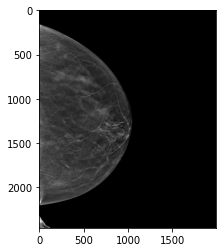

In [4]:
plt.imshow(image, cmap=plt.cm.gray);

In [5]:
%%time
image_path = '/data/Breast-Cancer-Screening-DBT/DBT-P00002/01-01-2000-DBT-S03345-MAMMO diagnostic digital bilateral-69013/21100.000000-31618/1-1.dcm'
image = dcmread_image(image_path)

CPU times: user 49.9 s, sys: 3.69 s, total: 53.5 s
Wall time: 53.7 s


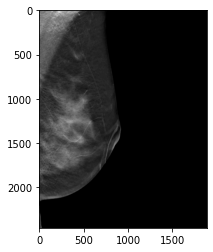

In [6]:
plt.imshow(image[0], cmap=plt.cm.gray);